## oppgave 1 - lagrangepolynomer

### a) c)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def cardinal(xdata, x):
    cardinal = []

    for i in range(len(xdata)):
        poly = 1
        for j in range(len(xdata)):
            if (i != j):
                poly = poly * (x-xdata[j])/(xdata[i]-xdata[j])
        cardinal.append(poly)
    return cardinal

def lagrange(ydata, cardinal):
    lagrange = 0
    for i in range(len(ydata)):
        lagrange += ydata[i]*cardinal[i]
    return lagrange


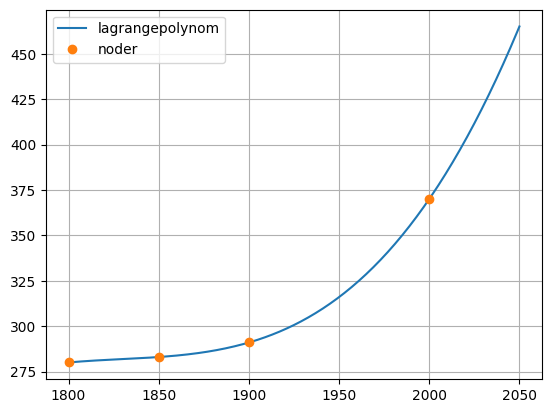

In [3]:
xdata = [1800, 1850, 1900, 2000]
ydata = [280, 283, 291, 370]
x = np.linspace(1800, 2050, 251)

cardinalFunctions = cardinal(xdata, x)
lagrangePolynomial = lagrange(ydata, cardinalFunctions)

plt.plot(x, lagrangePolynomial, label = "lagrangepolynom")
plt.plot(xdata, ydata, 'o', label = "noder")
plt.legend()
plt.grid()
plt.show()


### b)

In [4]:
print(f'i 1950: {lagrangePolynomial[np.where(x==1950)]}.')
print(f'i 2050: {lagrangePolynomial[np.where(x==2050)]}.')

i 1950: [316.].
i 2050: [465.].


## 3)

### a) b) c)

In [30]:
def CQR(f, QR, a, b, m):
    # h = (b-a)/m
    # xs = np.ones(m+1)

    # for i in range(m+1):
    #     xs[i] = a + i*h

    xs = np.linspace(a, b, m+1)

    total = 0

    for i in range(m):
        total += QR(f, xs[i], xs[i+1])
    return total

# Left endpoint rule
def LQ(f, a, b):
    return (b-a)*f(a)

def f(x):
    return np.sin(x)

# Trapezoidal rule
def T(f, a, b):
    return ((b-a)/2)*(f(a)+f(b))

# Simpson's regel
def S(f, a, b):
    return ((b-a)/6)*(f(a)+f(b)+4*(f((b+a)/2)))

I = 2

print(f'løst med simpsons regel: {CQR(f, S, 0, np.pi, 10)}')
print(f'løst med trapesregelen: {CQR(f, T, 0, np.pi, 10)}')

print(f'I-S: {I-CQR(f, S, 0, np.pi, 10)}')
print(f'I-T: {I-CQR(f, T, 0, np.pi, 10)}')

løst med simpsons regel: 2.0000067844418012
løst med trapesregelen: 1.9835235375094546
I-S: -6.7844418012441565e-06
I-T: 0.01647646249054535


## 5)

### b) c)

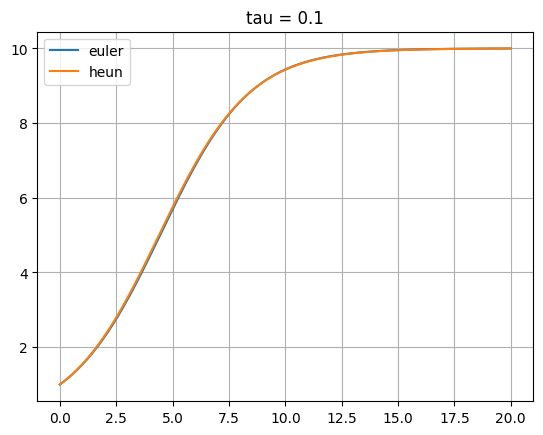

In [48]:
def euler(f, y0, t0, T, nMax):
    tau = (T - t0)/nMax
    ts = [t0]
    ys = [y0]

    while (ts[-1] < T):
        yNext = ys[-1] + tau * f(ts[-1], ys[-1])
        ys.append(yNext)
        ts.append(ts[-1] + tau)

    return (np.array(ts), np.array(ys))

def heun(f, y0, t0, T, nMax):
    tau = (T - t0)/nMax
    ts = [t0]
    ys = [y0]

    while (ts[-1] < T):
        k1 = f(ts[-1], ys[-1])
        k2 = f(ts[-1] + tau, ys[-1] + tau * k1)
        yNext = ys[-1] + tau/2 * (k2 + k1)
        ys.append(yNext)
        ts.append(ts[-1] + tau)

    return (np.array(ts), np.array(ys))

def f(t, y):
    return r * y * (1 - y/K)
    
r = 1/2
K = 10
y0 = 1
t0 = 0
T = 20
nMax = 200
tau = T / nMax

tList, yList = euler(f, y0, t0, T, nMax)
plt.plot(tList, yList, label = "euler")

tList, yList = heun(f, y0, t0, T, nMax)
plt.plot(tList, yList, label = "heun")
plt.legend()
plt.grid()
plt.title(f'tau = {tau}')
plt.show()


## 6)

### a)

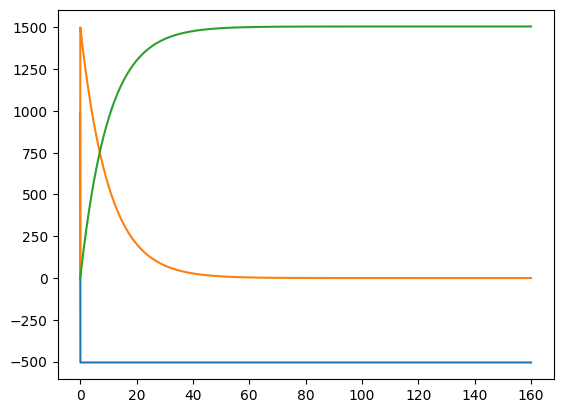

In [61]:
def RK4(f, y0, t0, T, nMax):
    dt = (T - t0)/nMax
    ts = [t0]
    ys = [y0]

    while (ts[-1] < T):
        t, y = ts[-1], ys[-1]
        k1 = f(t, y)
        k2 = f(t + dt/2, y + dt * (k1/2))
        k3 = f(t + dt/2, y + dt * (k2/2))
        k4 = f(t + dt, y + dt * k3)
        yNext = y + dt * (k1/6 + k2/3 + k3/3 + k4/6)

        ys.append(yNext)
        ts.append(t + dt)

    return (np.array(ts), np.array(ys))

def f(t, y):
    # dS = -beta * y[0] * y[1]
    # dI = beta * y[0] * y[1] - gamma * y[1]
    # dR = gamma * y[1]

    S, I, R = np.maximum(y, 0)
    dS = -beta * S * I
    dI = beta * S * I - gamma * I
    dR = gamma * I
    return np.array([dS, dI, dR])

beta = 0.3
gamma = 1/10
nMax = 5000
t0 = 0
T = 160
y0 = np.array([990, 10, 0])

tArray, yArray = RK4(f, y0, t0, T, nMax)
plt.plot(tArray, yArray)
plt.show()


noe feil her...